In [ ]:
!nvidia-smi

Mon Oct 14 16:25:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 50.7 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("deep-learning-course-yzjin").project("fruitdetection-ov0x3")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FruitDetection-4 in yolov11:: 100%|██████████| 4550/4550 [00:00<00:00, 6123.67it/s]


In [ ]:
dataset.location

'/content/FruitDetection-4'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=25 imgsz=640

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/FruitDetection-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

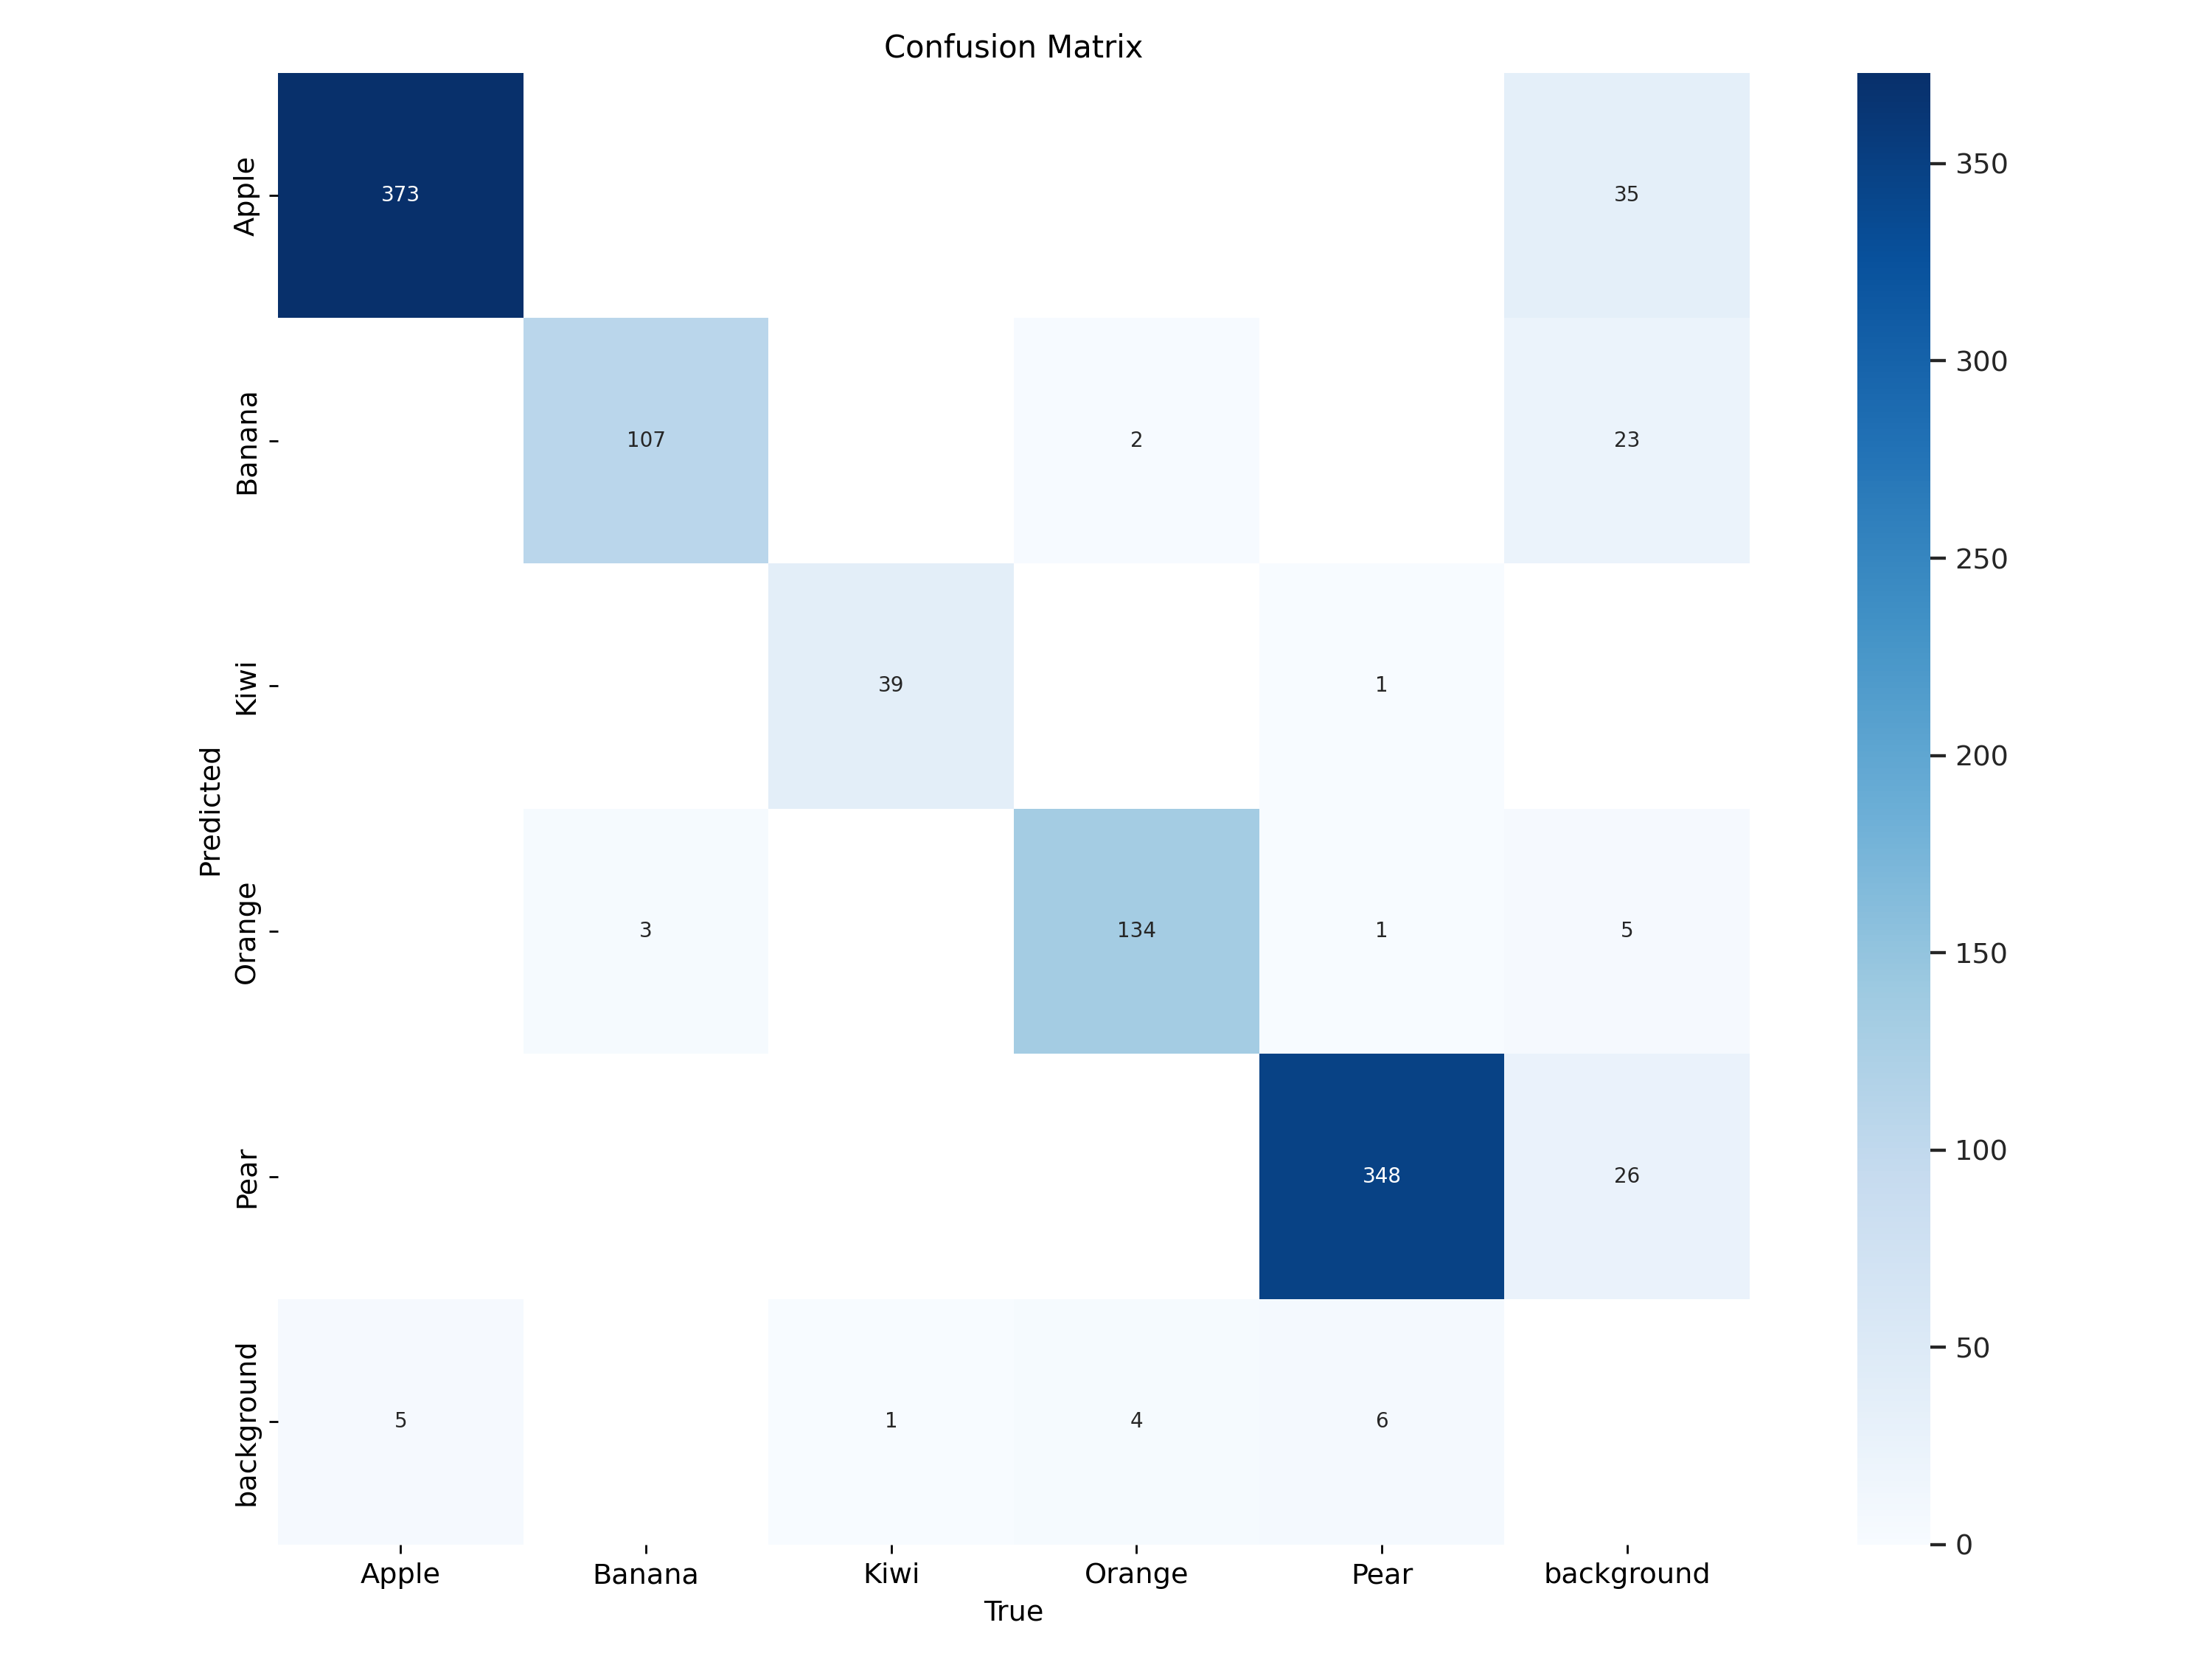

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

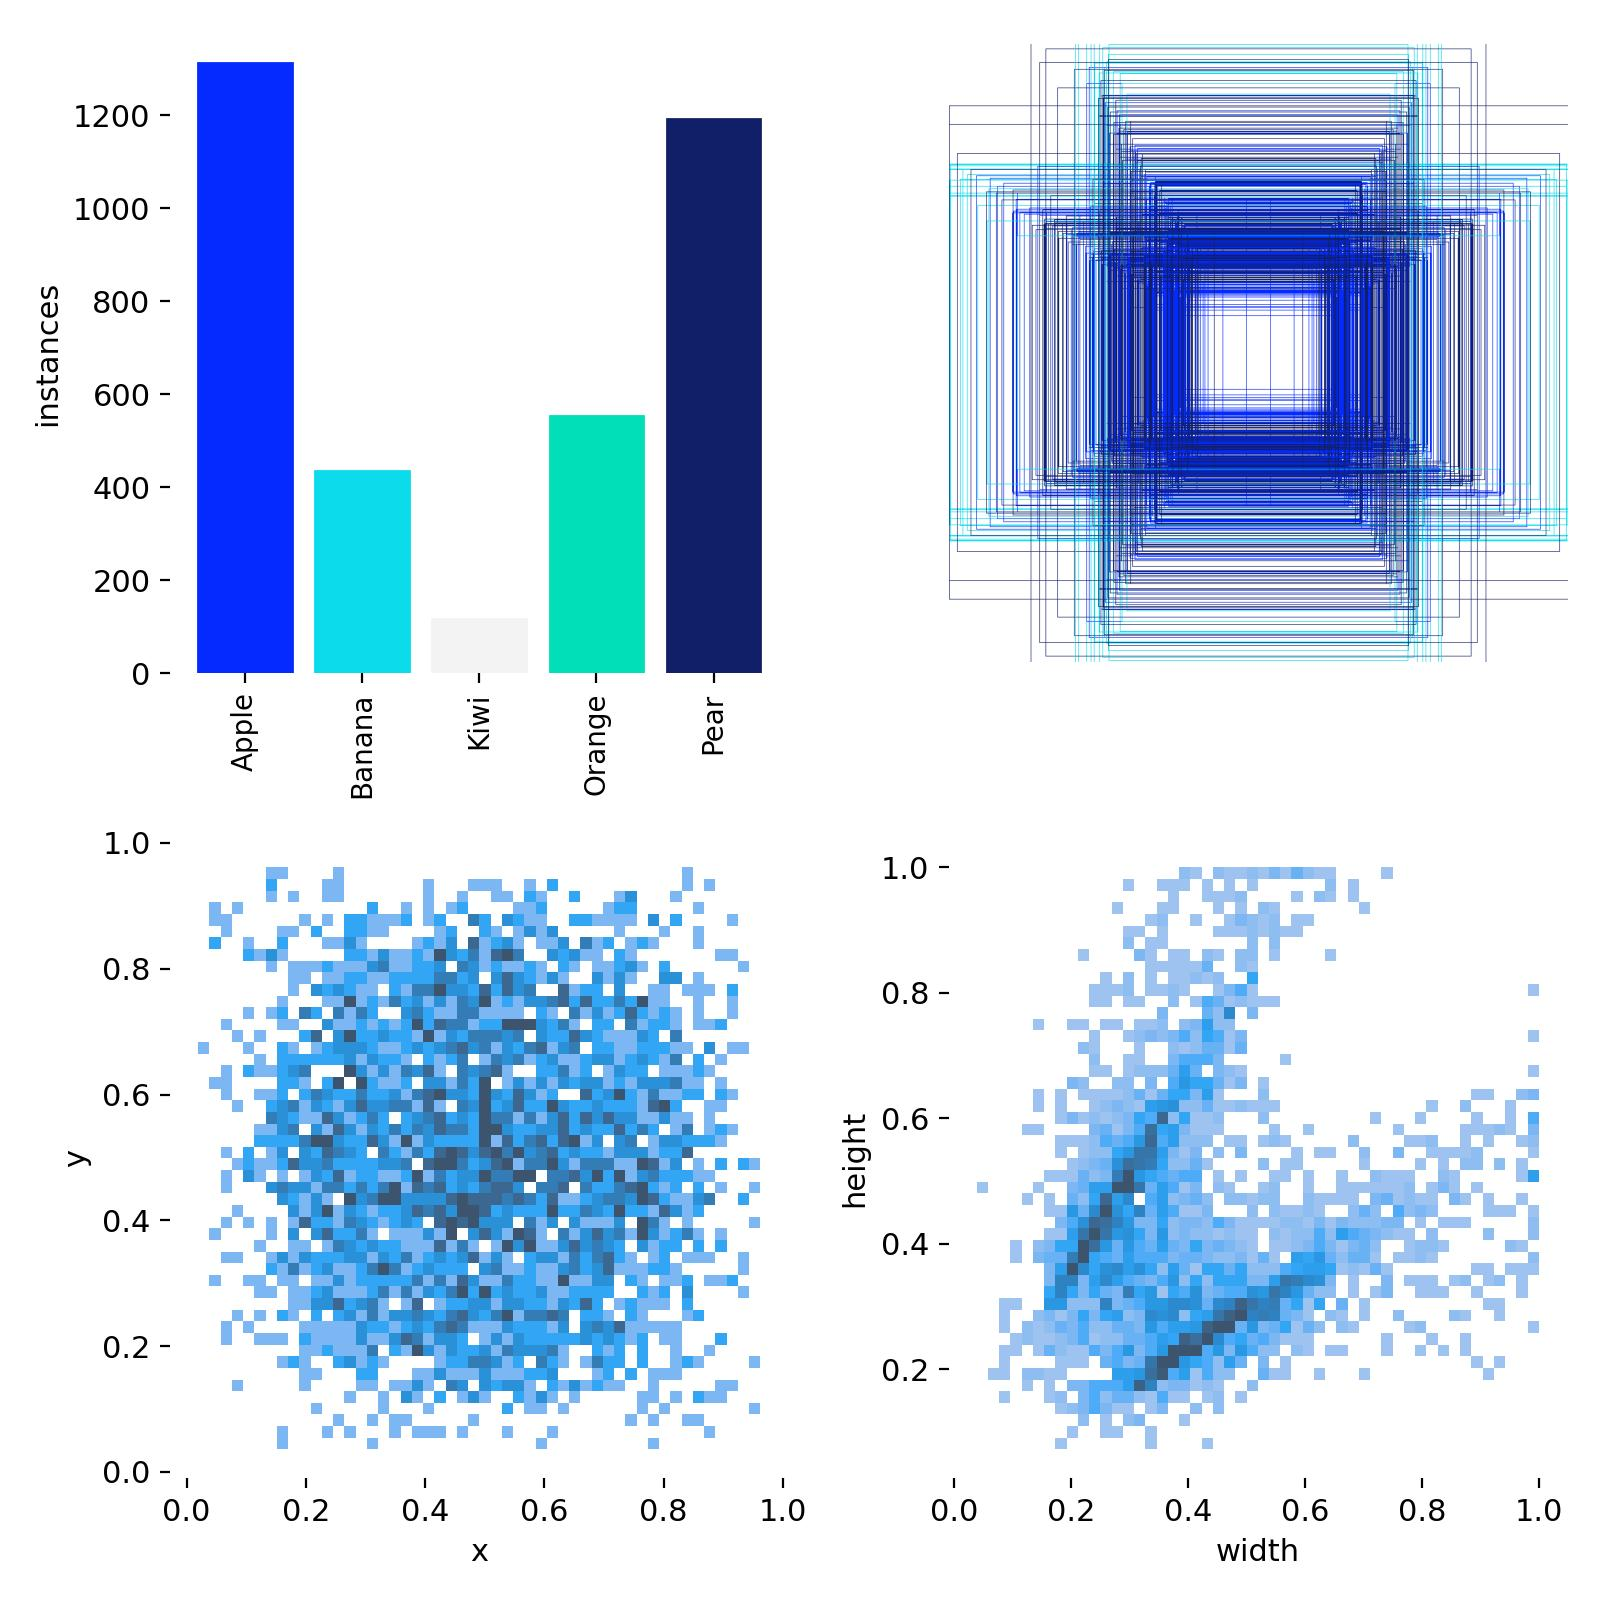

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

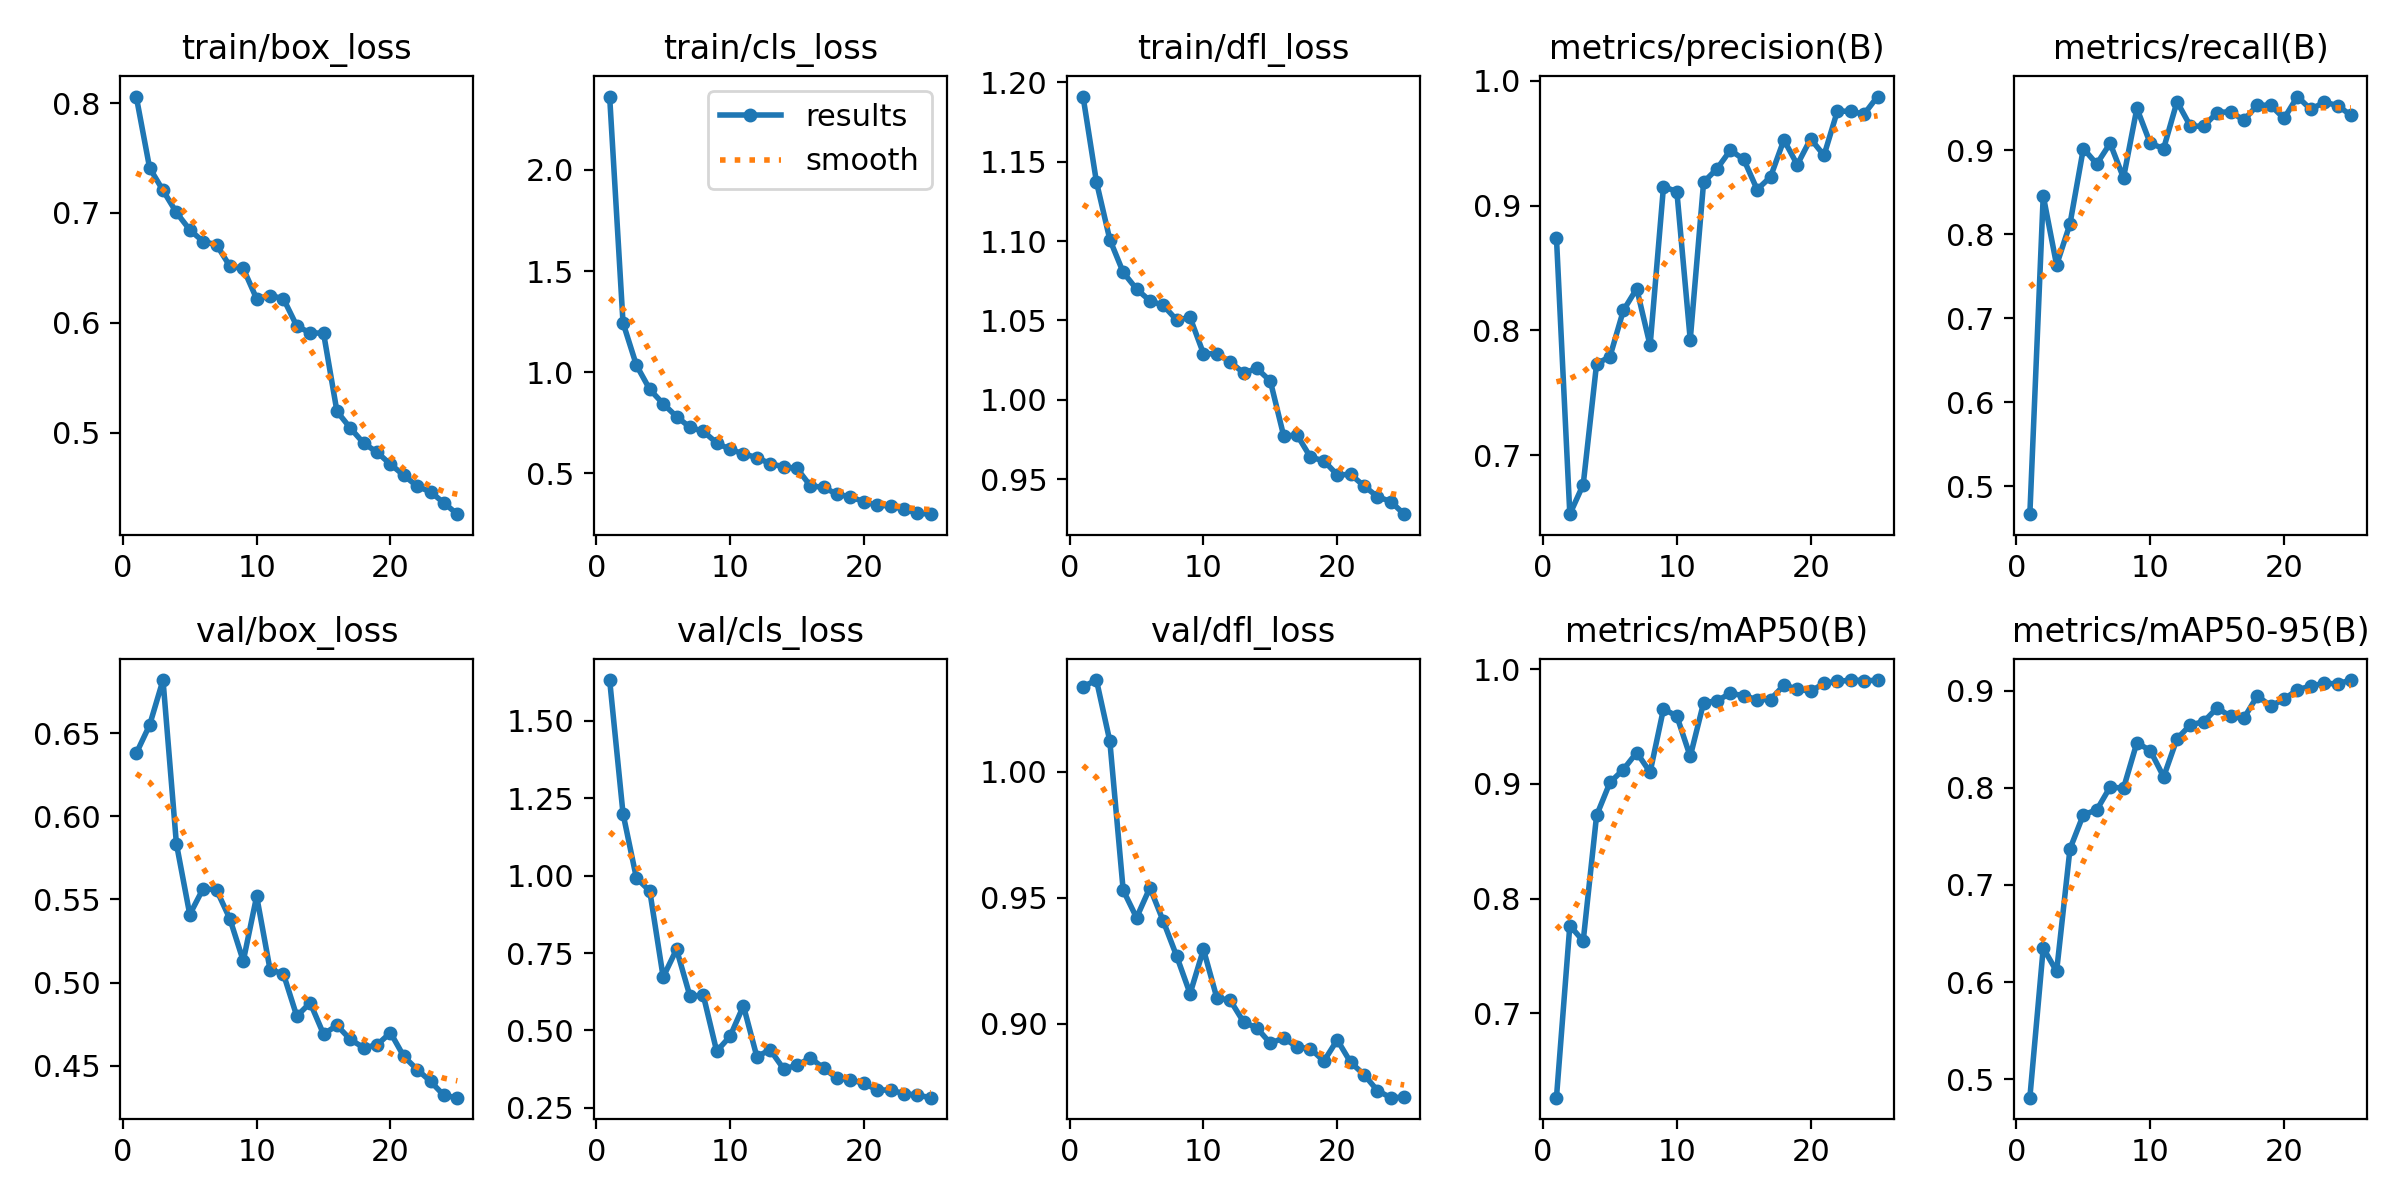

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

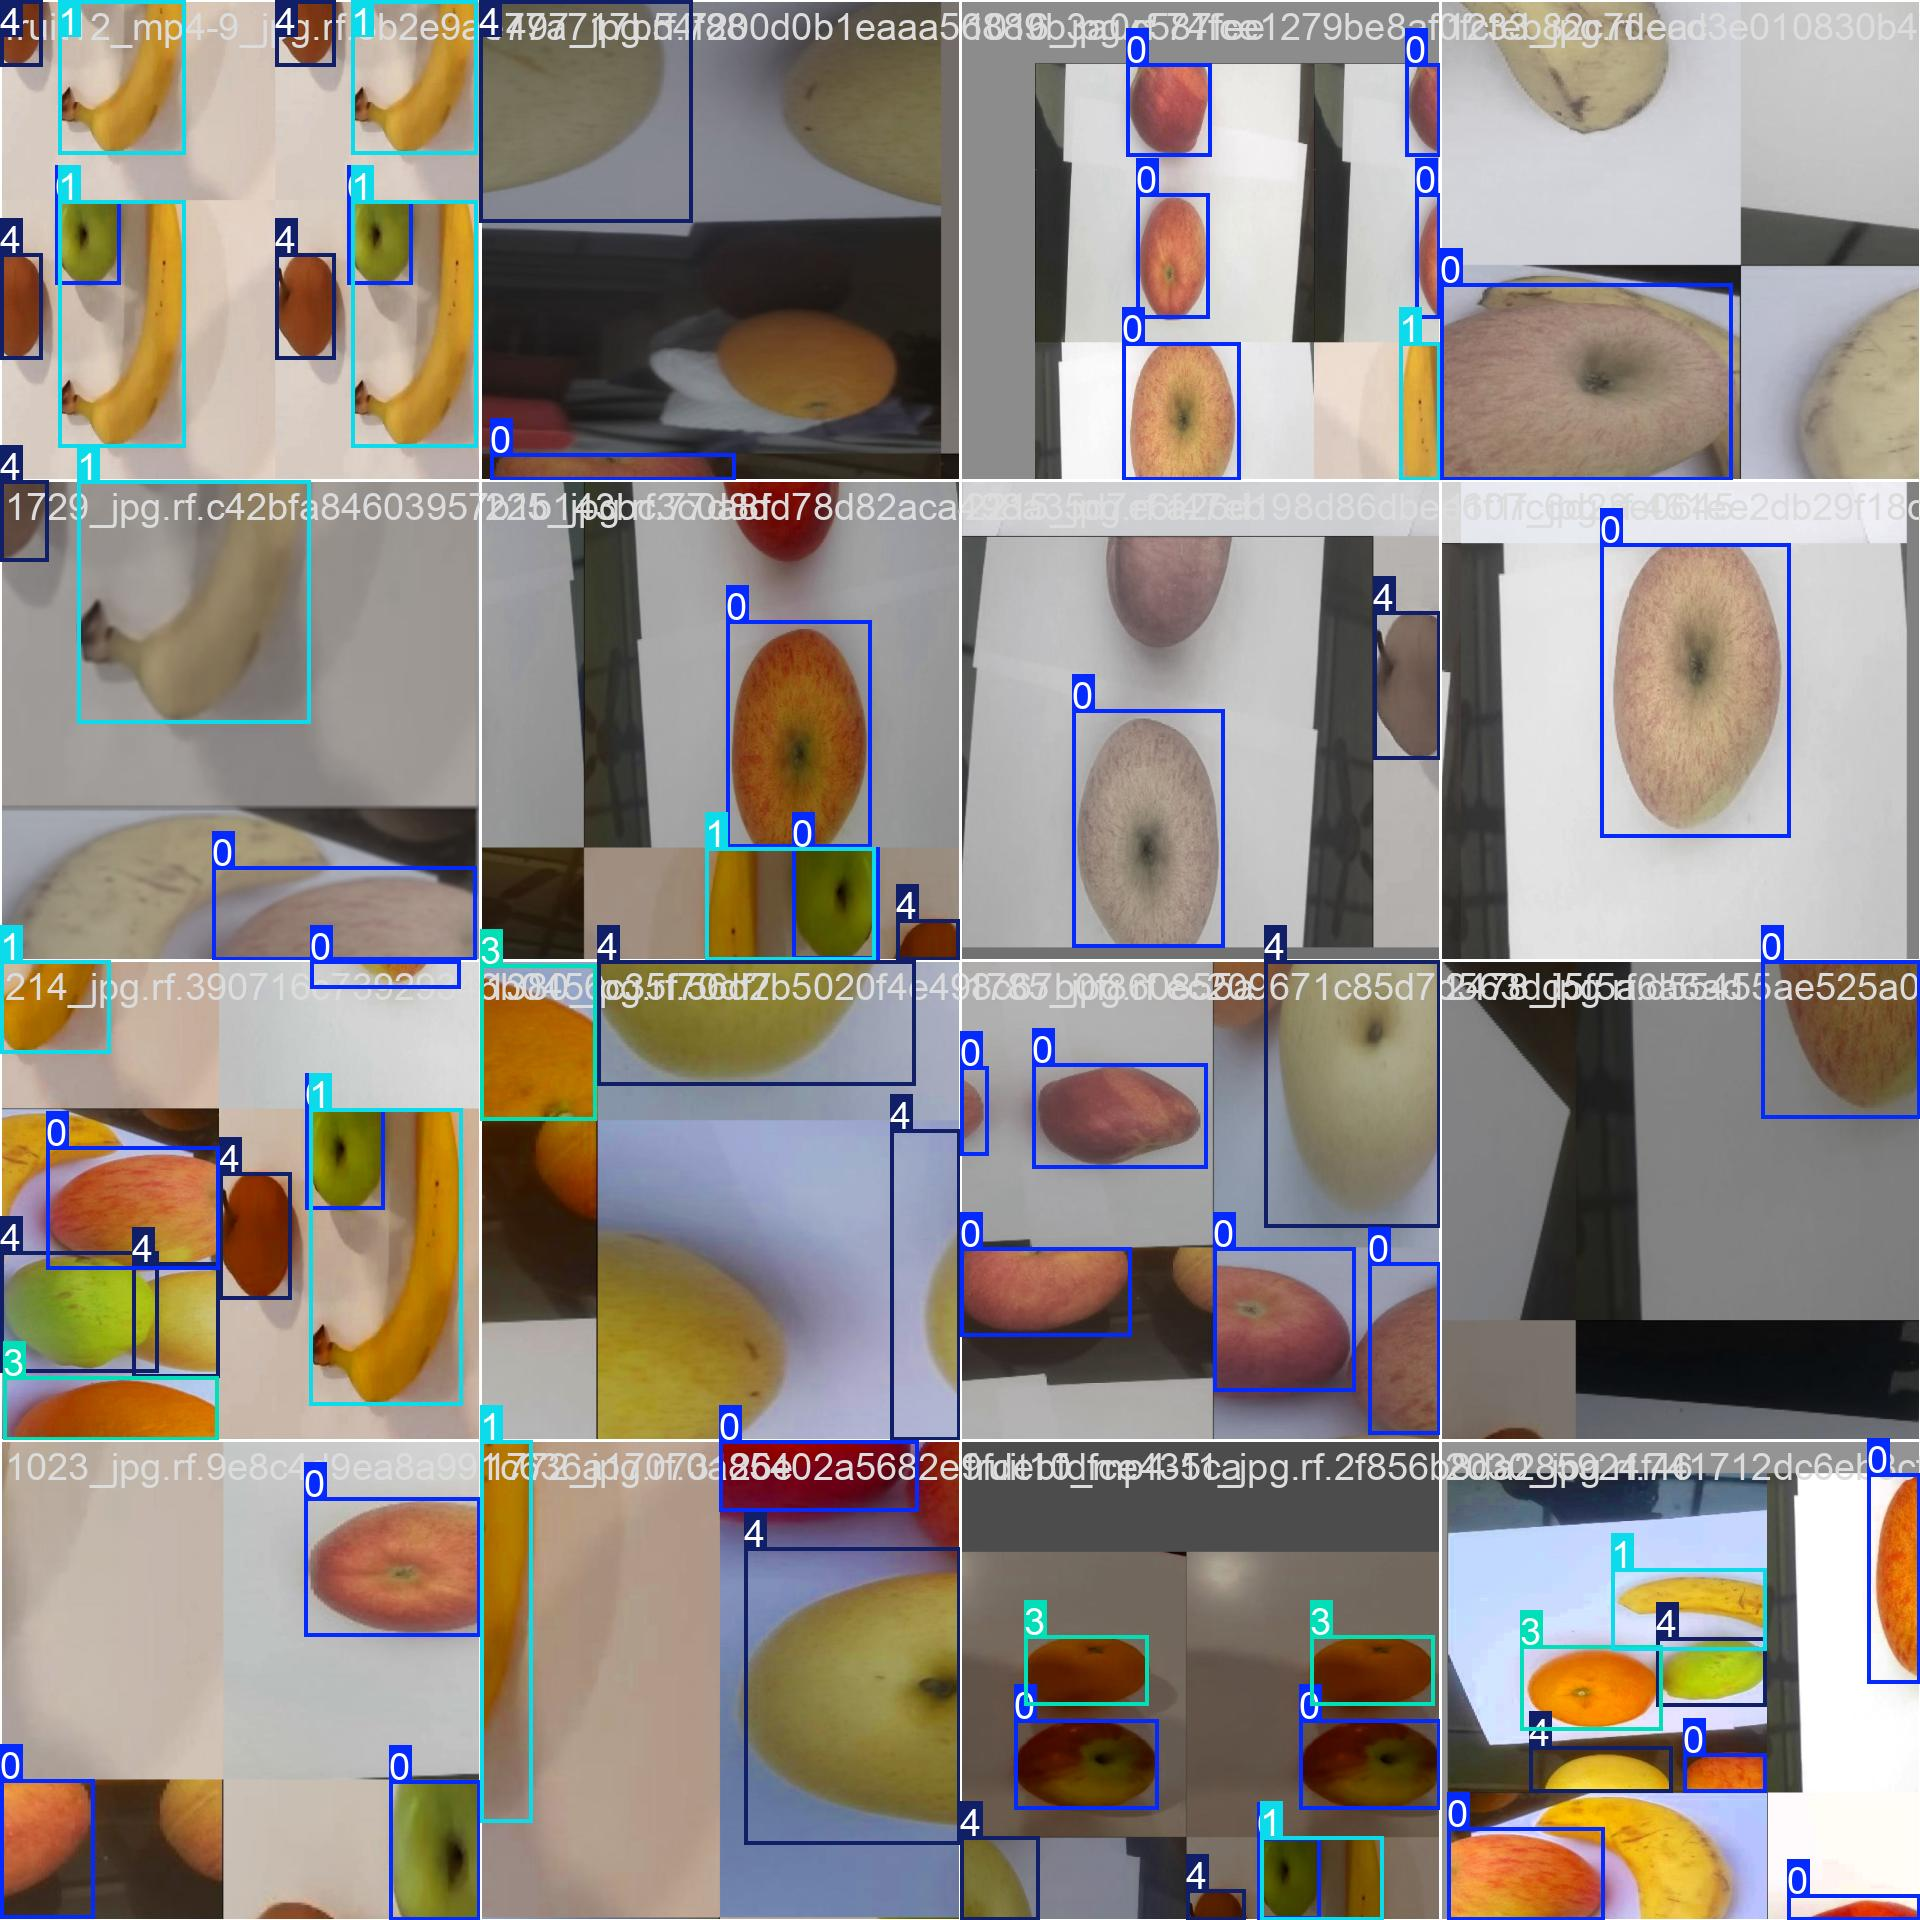

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

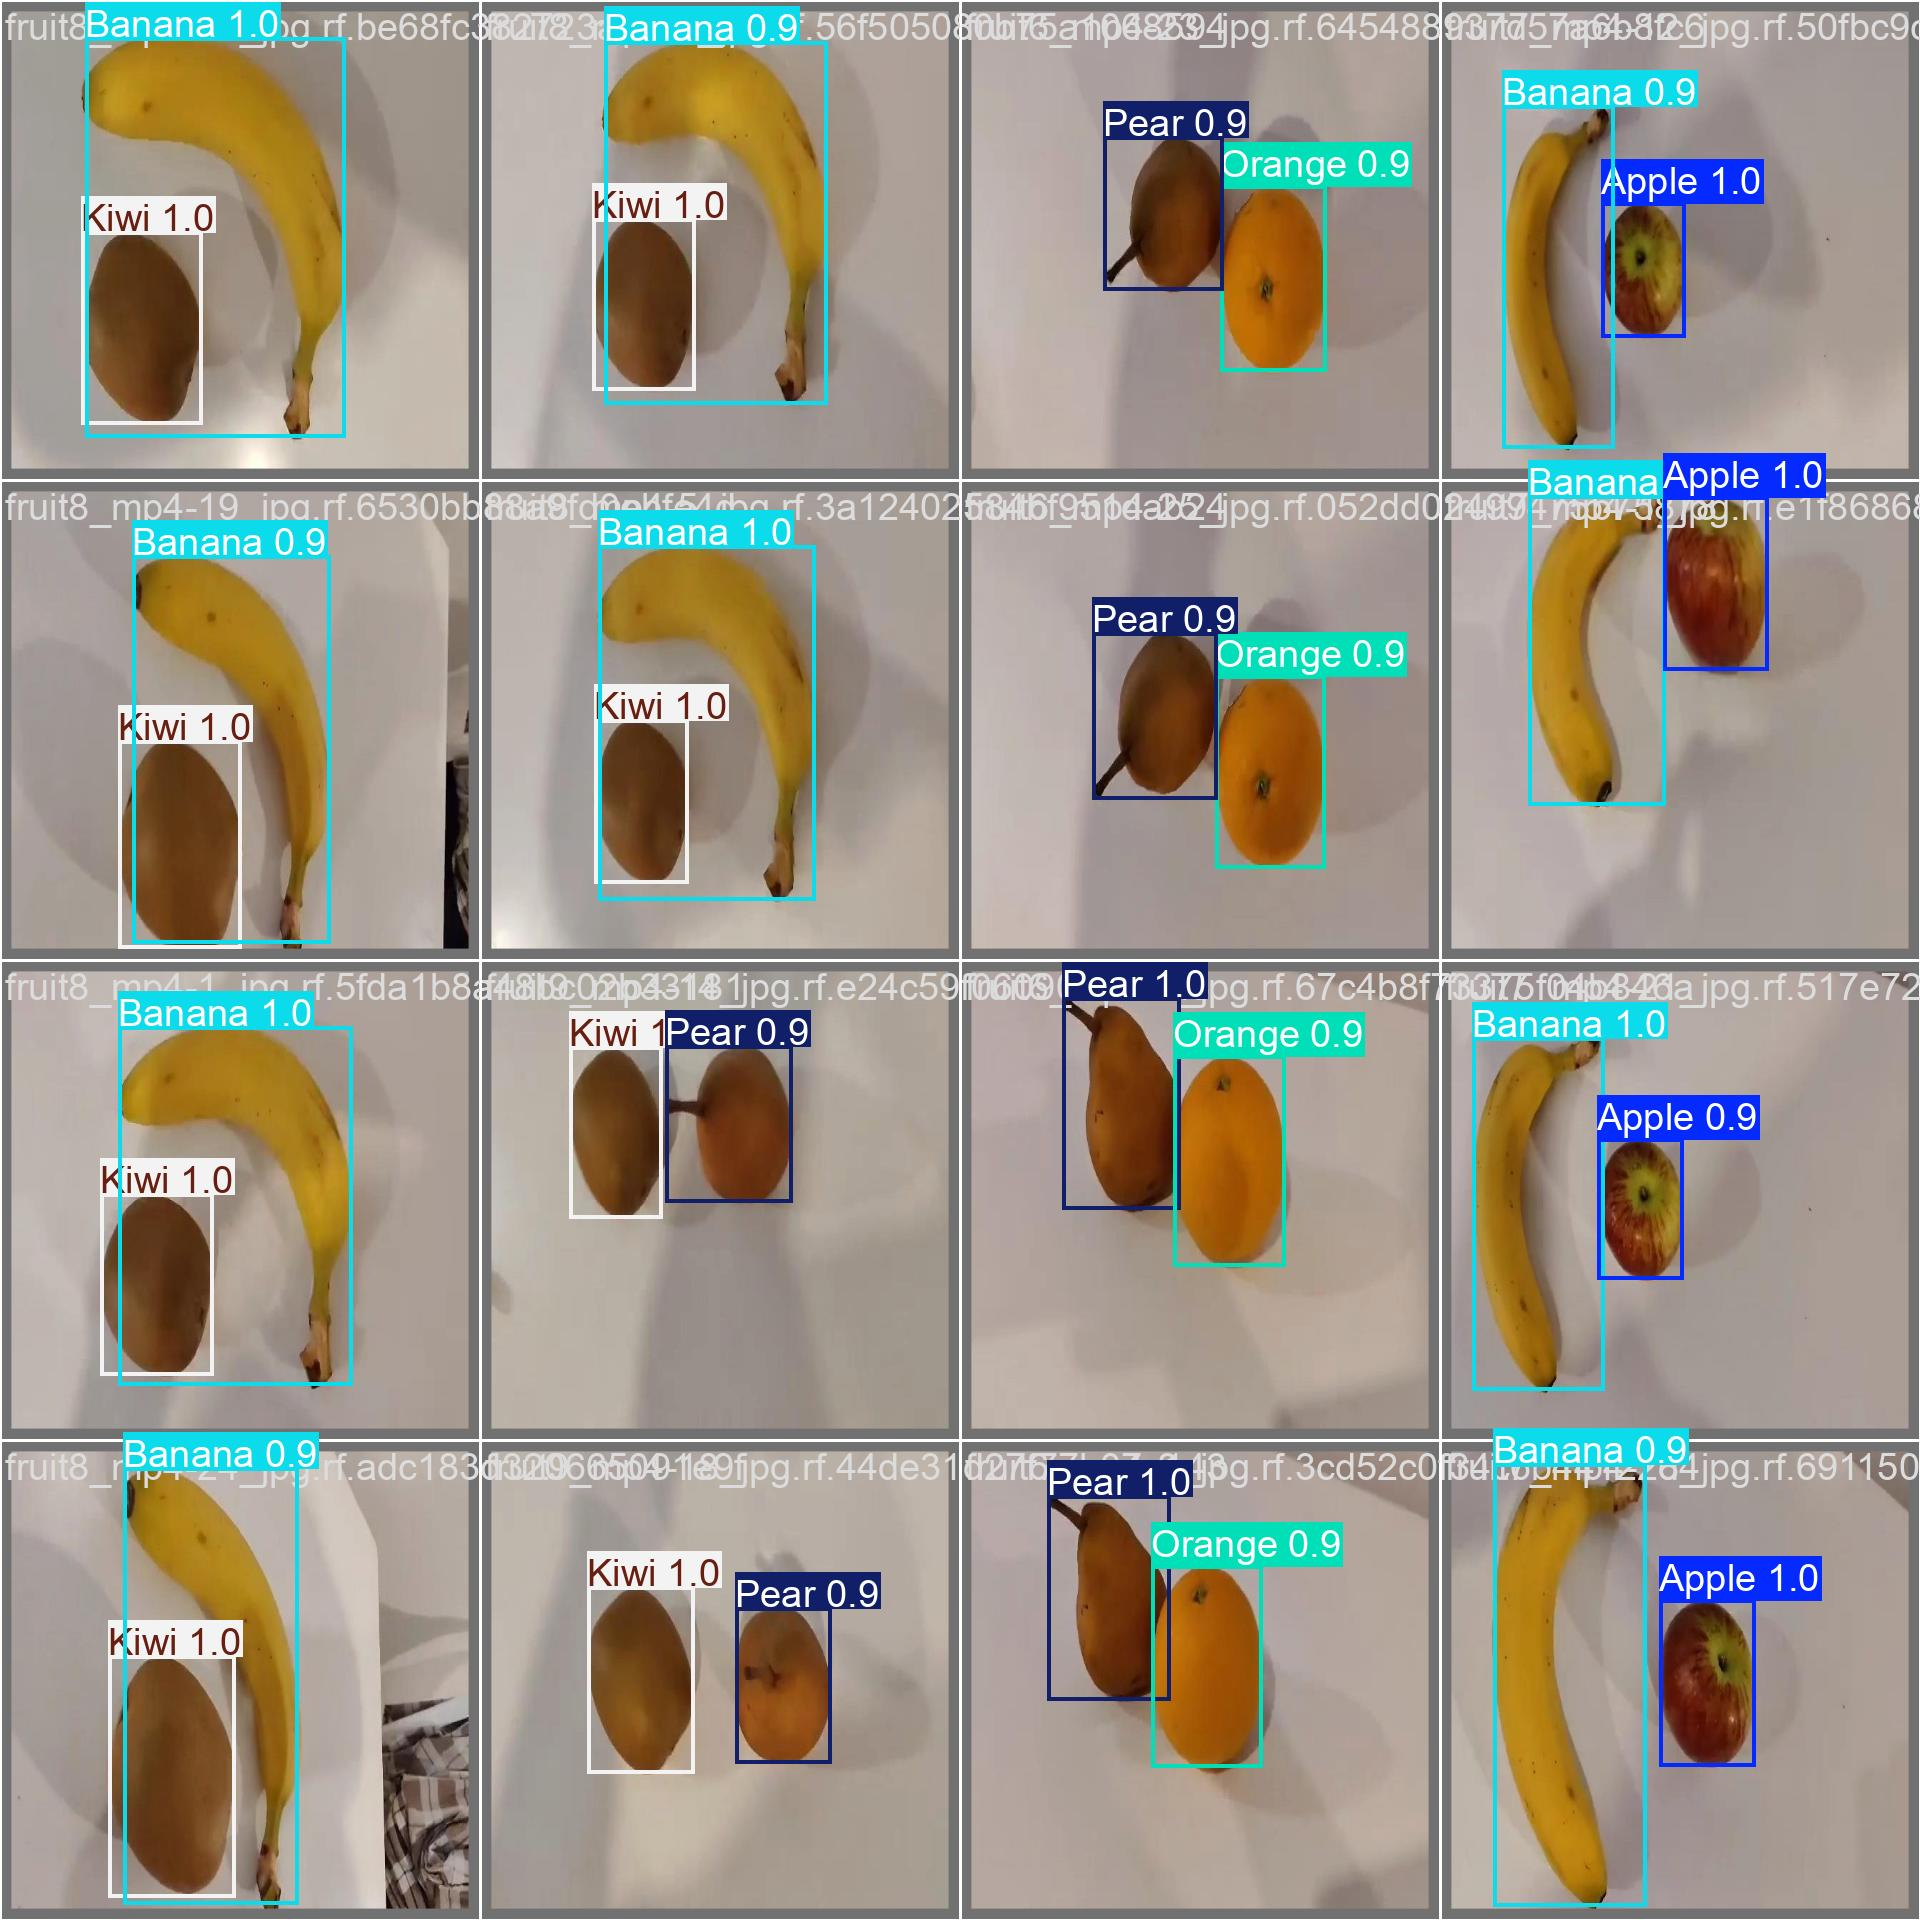

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

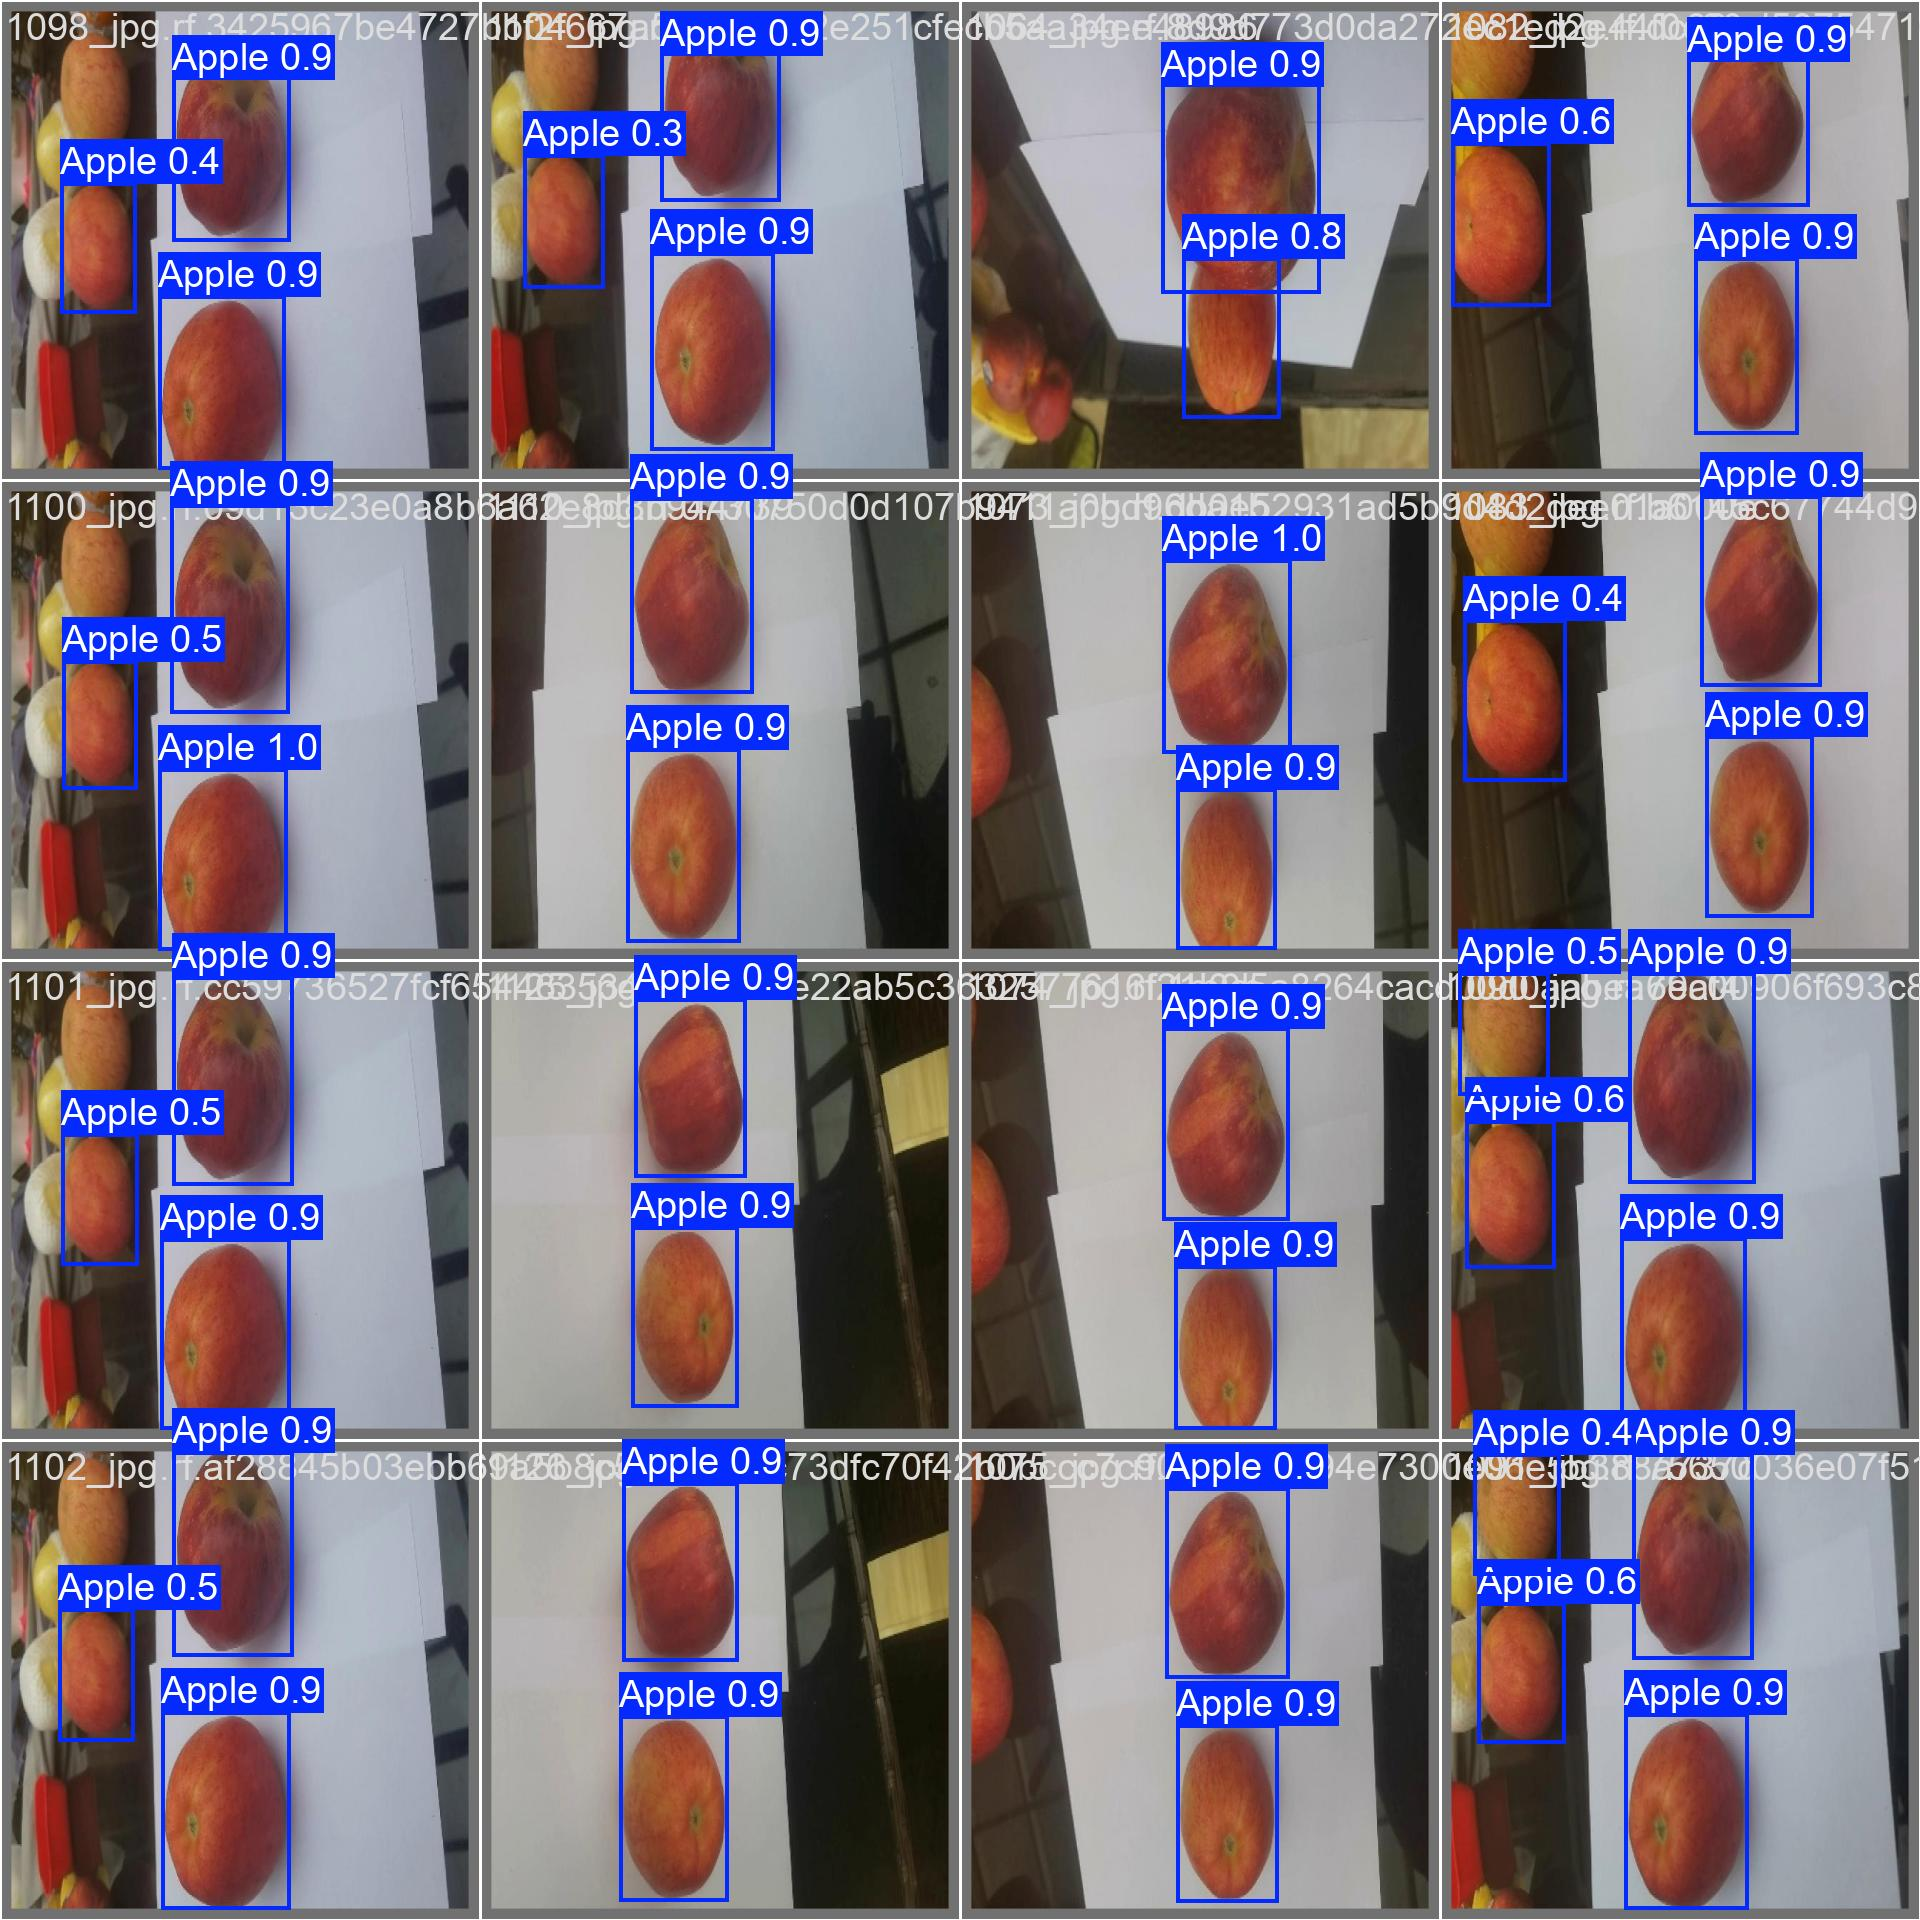

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/FruitDetection-4/valid/labels.cache... 453 images, 0 backgrounds, 0 corrupt: 100% 453/453 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 29/29 [00:06<00:00,  4.32it/s]
                   all        453       1024      0.988      0.942       0.99       0.91
                 Apple        245        378      0.981      0.953      0.989      0.902
                Banana        110        110      0.991       0.95      0.992      0.873
                  Kiwi         40         40          1      0.965      0.994      0.974
                Orange        140        140      0.992      0.888      0.984      0.913
                  Pear        253        356      0.974      0.953      0.991      0.888
Speed: 1.4ms preprocess, 4.4ms inference, 0.0

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/230 /content/FruitDetection-4/test/images/1010_jpg.rf.9267cb5371f6978192e7b8f6f3b15aba.jpg: 640x640 2 Apples, 11.3ms
image 2/230 /content/FruitDetection-4/test/images/1015_jpg.rf.aec53c410af9beec102686012ab44261.jpg: 640x640 2 Apples, 8.6ms
image 3/230 /content/FruitDetection-4/test/images/1032_jpg.rf.ddce19c6e47130e1eddd79216332c9ba.jpg: 640x640 2 Apples, 7.8ms
image 4/230 /content/FruitDetection-4/test/images/1048_jpg.rf.eda916db579d1e067cf13180ffed23be.jpg: 640x640 2 Apples, 8.0ms
image 5/230 /content/FruitDetection-4/test/images/1049_jpg.rf.504a321d39ae487e17d147a01449c50a.jpg: 640x640 2 Apples, 9.5ms
image 6/230 /content/FruitDetection-4/test/images/1060_jpg.rf.daa267e8e3ea37e943c2e969c1c3c402.jpg: 640x640 2 Apples, 7.8ms
image 7/230 /content/FruitDetection-4/test/images/1065_jpg.rf.ff43e739ffff86a00e9930d9d9c

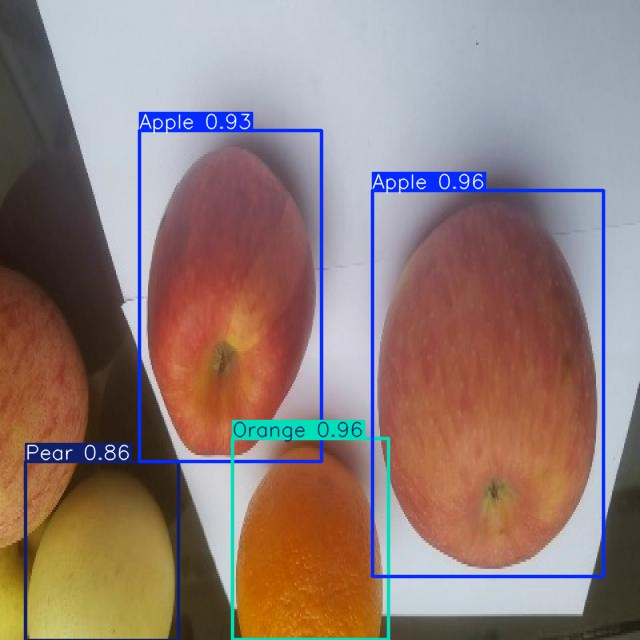

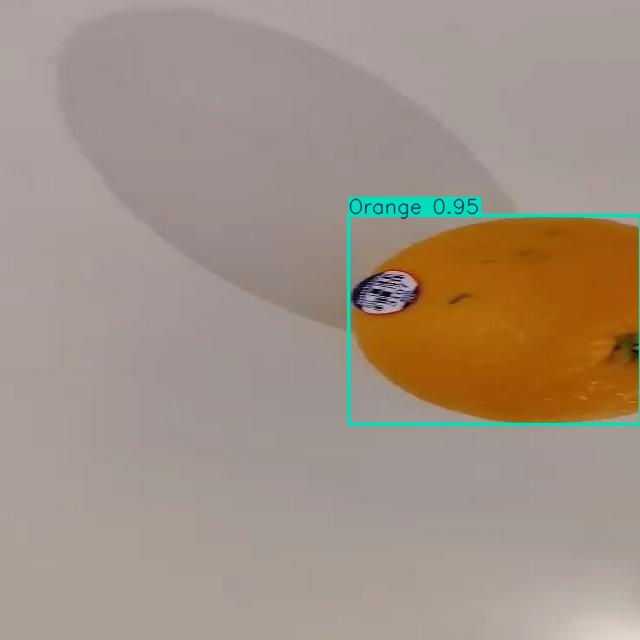

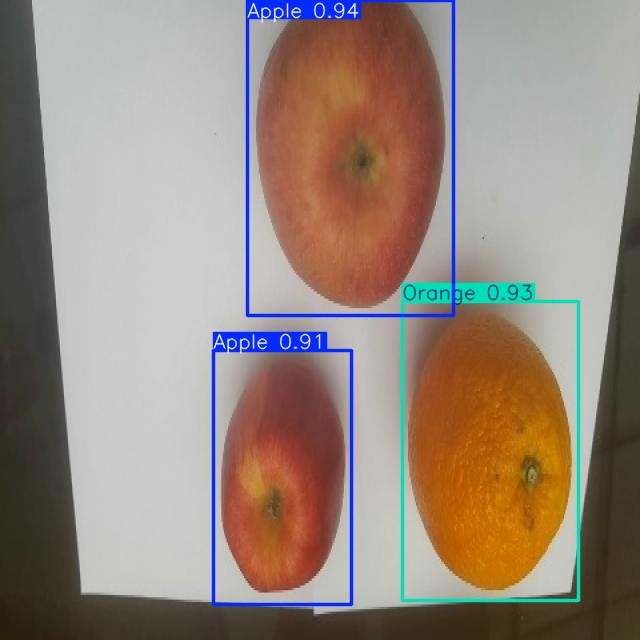

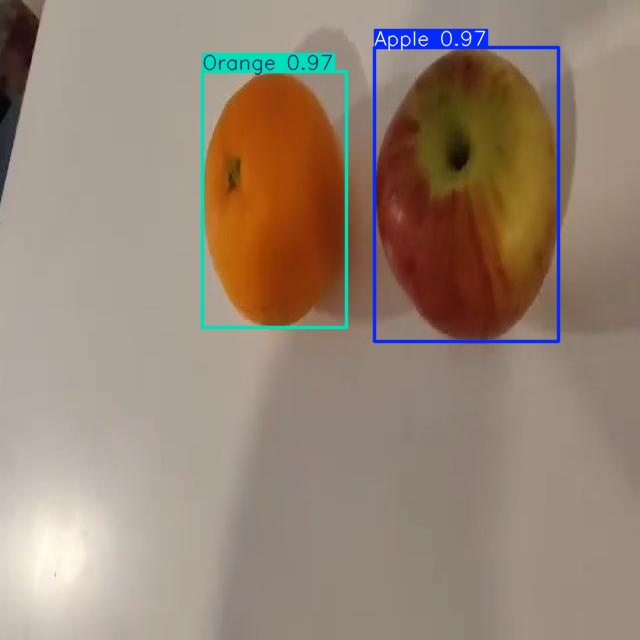

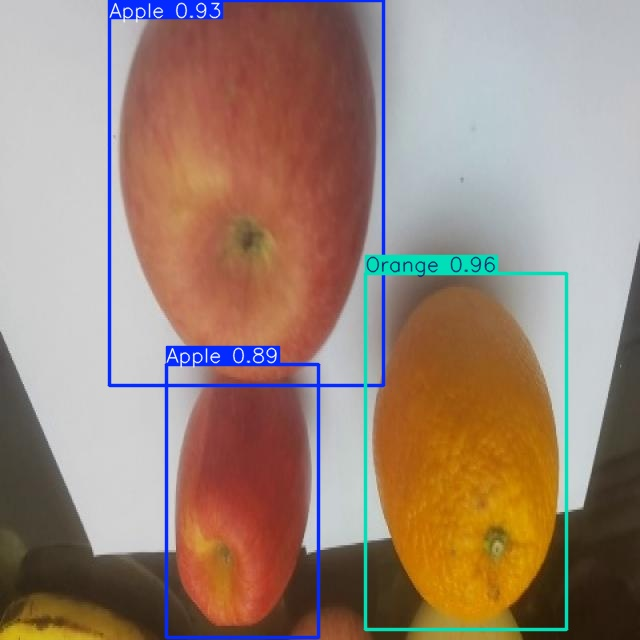

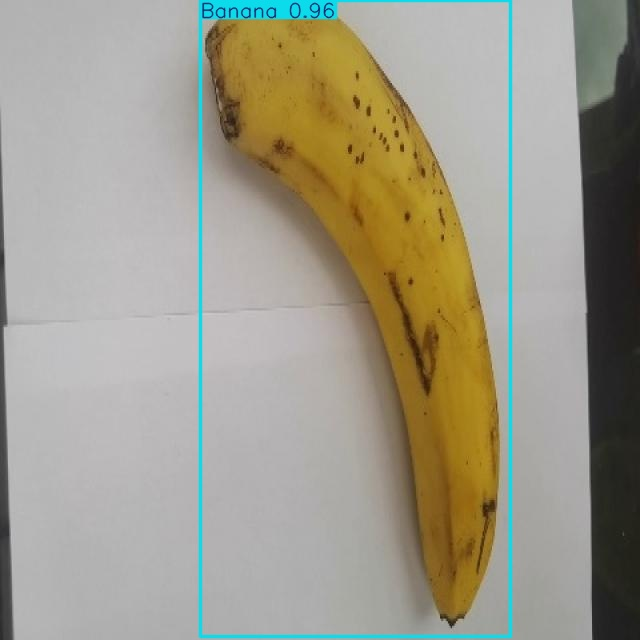

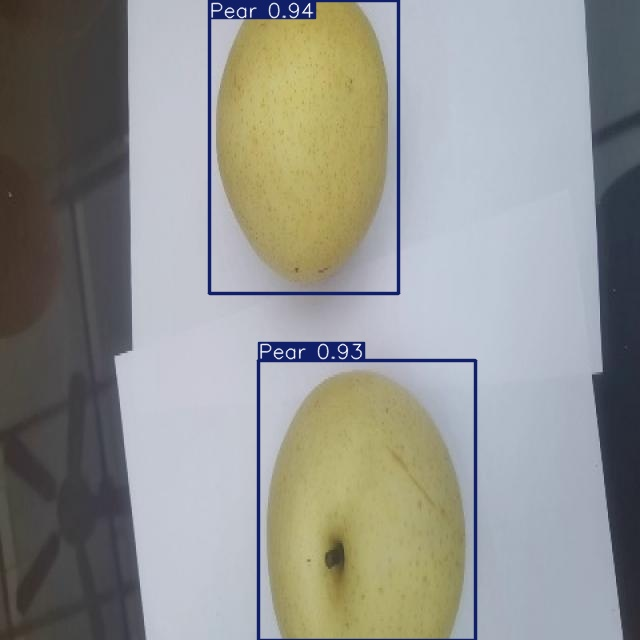

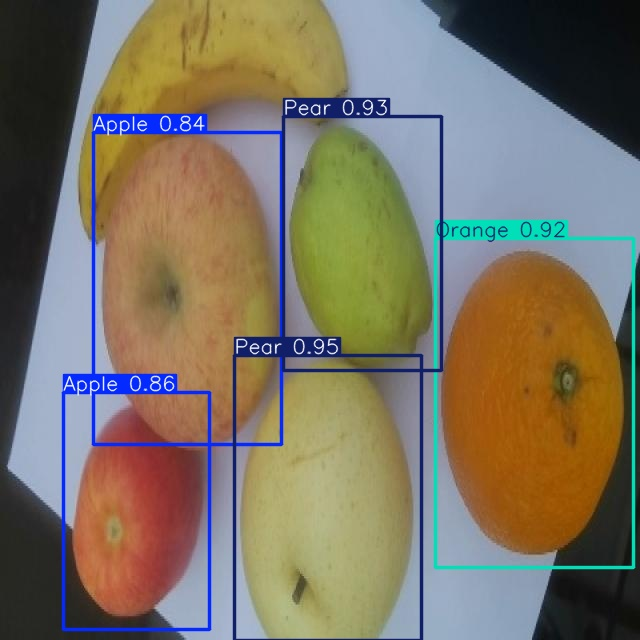

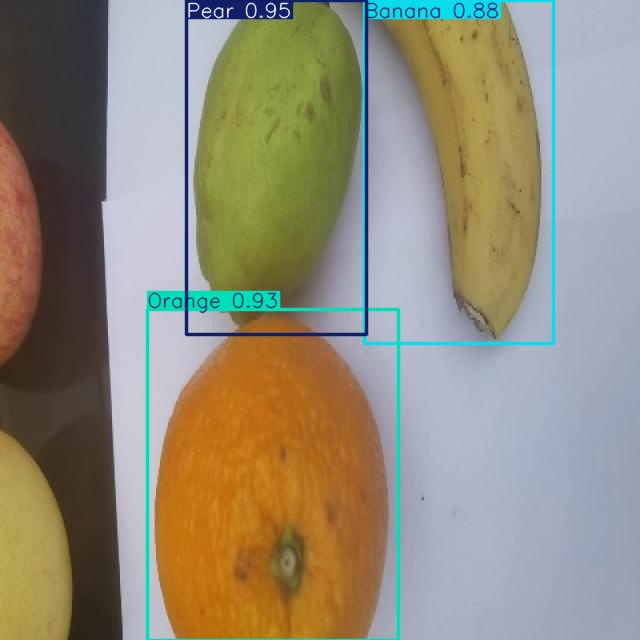

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")